In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/sachin/Desktop/Data analytics/clean2.xls')
df.head()

,X,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Pay_mean,bill_mean
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes,114.833333,1284.000000
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes,833.333333,2846.166667
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No,1836.333333,16942.166667
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No,1398.000000,38555.666667
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No,9841.500000,18223.166667


In [2]:
df1 = df
df1['default.payment.next.month'] = df1['default.payment.next.month'].astype('category').cat.codes
df1['SEX'] = df1['SEX'].astype('category').cat.codes
df1['EDUCATION'] = df1['EDUCATION'].astype('category').cat.codes
df1['MARRIAGE'] = df1['MARRIAGE'].astype('category').cat.codes


print(df1['LIMIT_BAL'].corr(df1['default.payment.next.month']))
print()
print(df1['SEX'].corr(df1['default.payment.next.month']))
print()
print(df1['MARRIAGE'].corr(df1['default.payment.next.month']))
print()
print(df1['AGE'].corr(df1['default.payment.next.month']))
print()
print(df1['Pay_mean'].corr(df1['default.payment.next.month']))
print()
print(df1['bill_mean'].corr(df1['default.payment.next.month']))
print()
print(df1['Pay_mean'].corr(df1['default.payment.next.month']))
print()

-0.15351987639350764

0.03996057770544173

-0.02914704663417418

0.013889834301963224

-0.10235438844349547

-0.012691359868777874

-0.10235438844349547



In [3]:
trainRow = df.iloc[1:20000,:]
testRow = df.iloc[20001:30000,:]
x_train = trainRow[["LIMIT_BAL","Pay_mean","SEX","MARRIAGE"]]
y_train = trainRow[["default.payment.next.month"]]
x_test = testRow[["LIMIT_BAL","Pay_mean","SEX","MARRIAGE"]]
y_test = testRow[["default.payment.next.month"]]

In [4]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

D:\Anaconda-3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)
confusion_matrix(y_test,y_pred)

Accuracy: 79.22792279227923


array([[7922,    0],
       [2077,    0]], dtype=int64)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
tree1.fit(x_train, y_train) 
y_pred = tree1.predict(x_test)

In [7]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)
metrics.precision_recall_fscore_support(y_test, y_pred,average='macro')

Accuracy: 79.30793079307931


(0.6731311980026827, 0.5081424303424446, 0.46197567777624193, None)

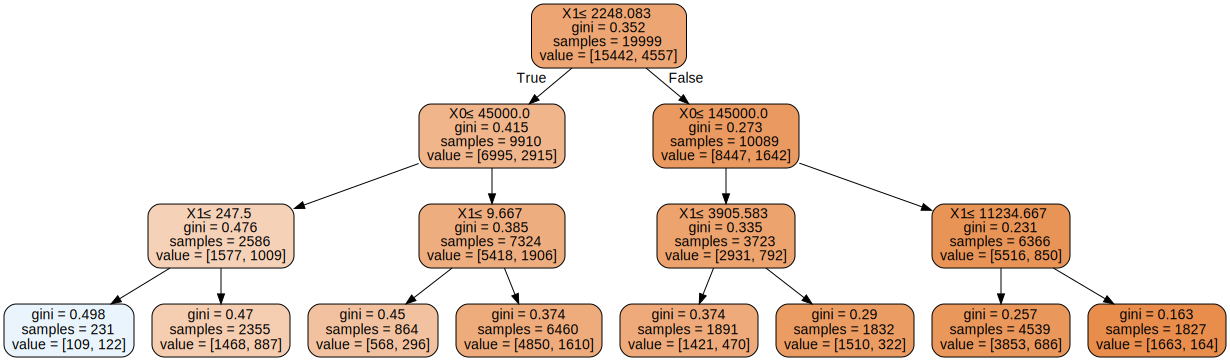

In [12]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tree1, out_file=None, 
     filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 



In [8]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections
dot_data = tree.export_graphviz(tree1,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

NameError: name 'tree' is not defined

In [9]:
feature = ["LIMIT_BAL","Pay_mean","SEX","MARRIAGE"]
target = "default.payment.next.month"

In [10]:
feature

['LIMIT_BAL', 'Pay_mean', 'SEX', 'MARRIAGE']

In [31]:
import graphviz
dot_data = tree.export_graphviz(tree1, out_file=None, 
     filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH